In [1]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.layers import Flatten, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.math import reduce_prod

In [2]:
# Loading the data
(x_train, _), (x_test, _) = load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        
        self.encoder = Sequential([
            Flatten(),
            Dense(latent_dim, activation='relu')
        ])
        
        self.decoder = Sequential([
            Dense(reduce_prod(shape).numpy(), activation='sigmoid'),
            Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [6]:
shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [7]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [8]:
autoencoder.fit(x_train, x_train, epochs=500, shuffle=True, validation_data=(x_test, x_test), batch_size=64)

Epoch 1/500
938/938 [==============================] - 4s 3ms/step - loss: 0.0304 - accuracy: 0.0998 - val_loss: 0.0165 - val_accuracy: 0.1265
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 0.0139 - accuracy: 0.1472 - val_loss: 0.0123 - val_accuracy: 0.1659
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 0.0114 - accuracy: 0.1776 - val_loss: 0.0109 - val_accuracy: 0.1874
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 0.0104 - accuracy: 0.1928 - val_loss: 0.0102 - val_accuracy: 0.1975
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 0.0099 - accuracy: 0.2016 - val_loss: 0.0098 - val_accuracy: 0.2060
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 0.0096 - accuracy: 0.2076 - val_loss: 0.0095 - val_accuracy: 0.2117
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 0.0094 - accuracy: 0.2111 - val_loss: 0.0094 - val_accuracy: 0.2139

In [9]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

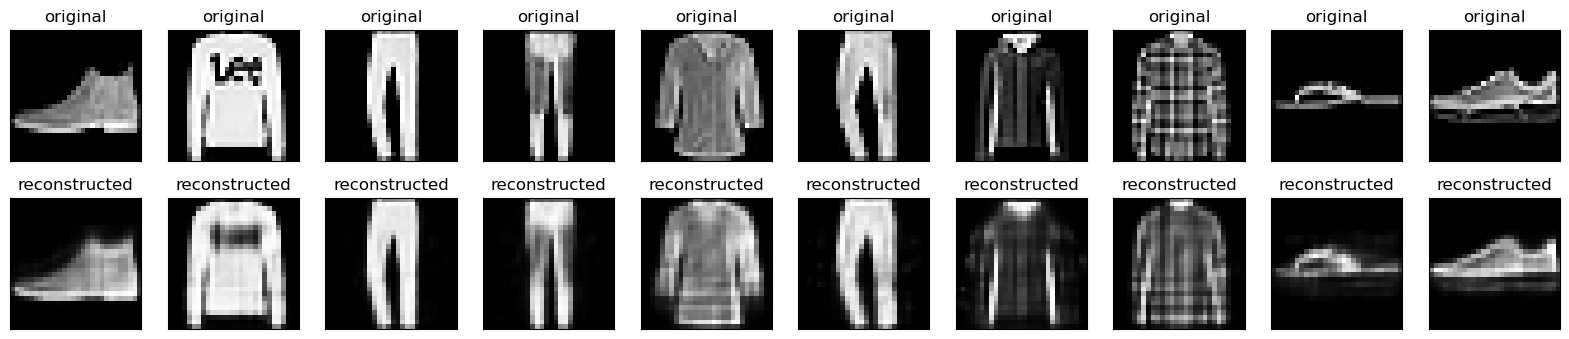

In [10]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
# Evaluate the autoencoder on the test set
accuracy = autoencoder.evaluate(x_test, x_test)
accuracy[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.2471


0.24714642763137817